In [19]:
# Load python modules
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
import tensorflow_datasets as tfds
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import PIL.Image
import PIL
import cv2
import os

In [20]:
#Class labels
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (64, 64)

In [21]:
print('Number of classes:', nb_classes)

Number of classes: 4


In [22]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/train_ds',
               'C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/test_ds']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [23]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/train_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 179.99it/s]


Loading C:/Mani/1_MSC Data Science/7 Data Science Project/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 157.16it/s]


In [24]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((160, 64, 64, 3), (60, 64, 64, 3))

In [25]:
# Shuffle only the training dataset
train_images, train_labels = shuffle(train_images, train_labels, random_state=123)

In [26]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 160


In [27]:
#Scale image data from 0 to 1 
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [28]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image Number {} : '.format(index) + class_names[labels[index]])
    plt.show()

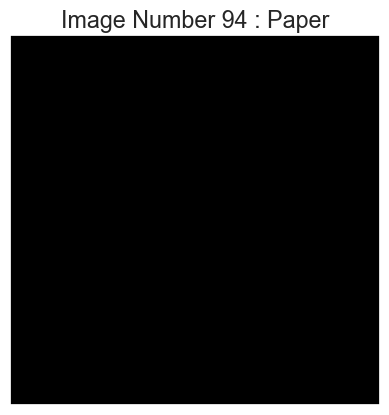

In [14]:
display_random_image(class_names, train_images, train_labels)

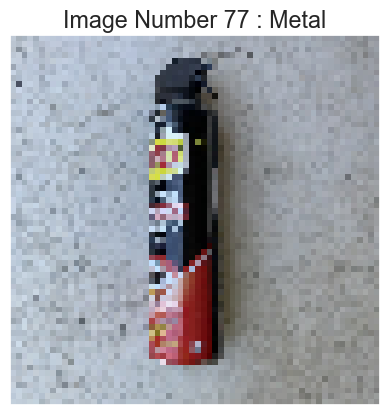

In [29]:
display_random_image(class_names, train_images, train_labels)

In [30]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

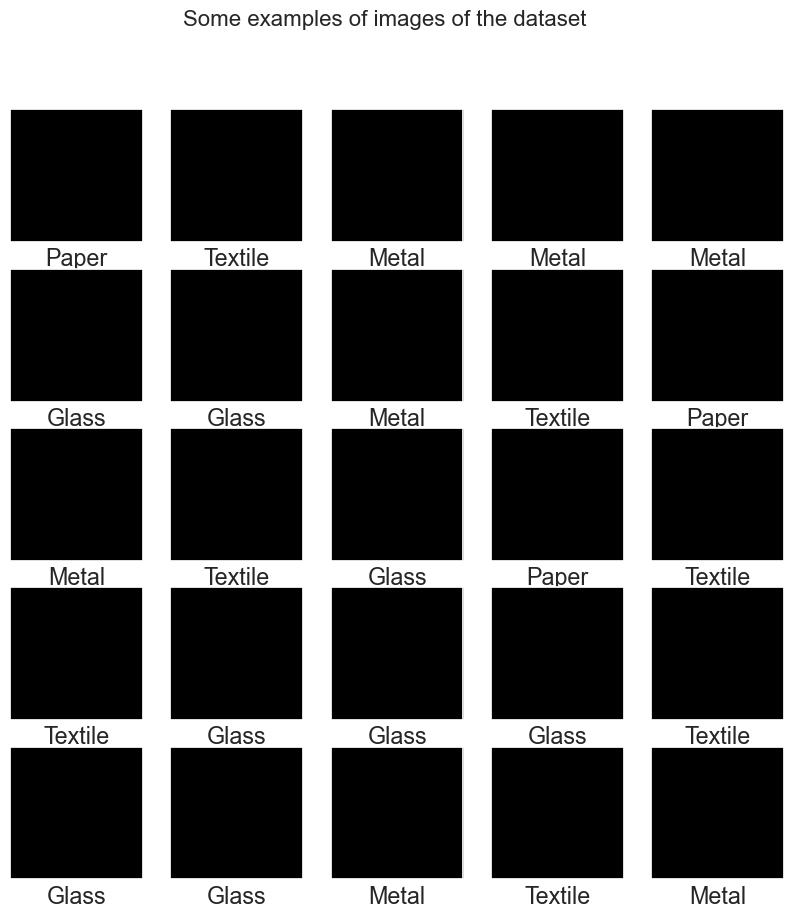

In [17]:
display_examples(class_names, train_images, train_labels)

In [31]:
#Sequential Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,64,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,863,236 (7.11 MB)

 Trainable params: 1,863,236 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model_1.fit(train_images, train_labels, batch_size=4, epochs=30, validation_split = 0.2)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2035 - loss: 1.9706 - val_accuracy: 0.4375 - val_loss: 1.3659
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3520 - loss: 1.3434 - val_accuracy: 0.2500 - val_loss: 1.3438
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4742 - loss: 1.1910 - val_accuracy: 0.3438 - val_loss: 1.3412
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5235 - loss: 1.0885 - val_accuracy: 0.5000 - val_loss: 1.2515
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5312 - loss: 0.9633 - val_accuracy: 0.3125 - val_loss: 1.2806
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5806 - loss: 0.8928 - val_accuracy: 0.6250 - val_loss: 1.0043
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7461 - loss: 0.6397 - val_accuracy: 0.4688 - val_loss: 1.1150
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7399 - loss: 0.6499 - val_accuracy: 0.5000 - v

Text(0.5, 1.0, 'Model Accuracy')

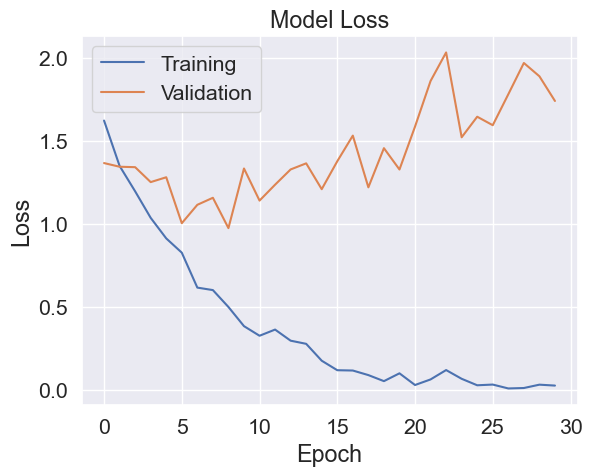

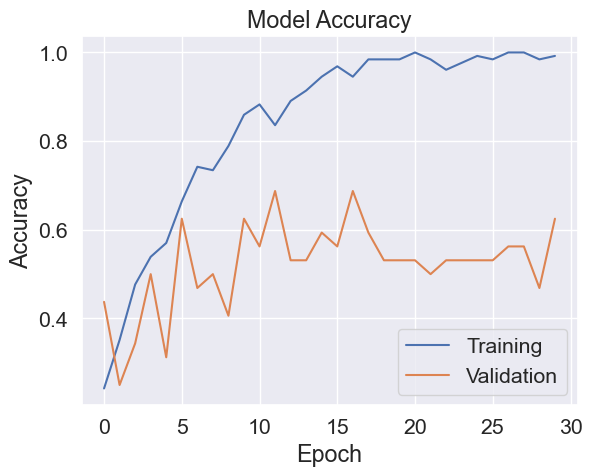

In [34]:

#Plot the training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')




In [35]:
test_loss = model_1.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6097 - loss: 1.5695 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


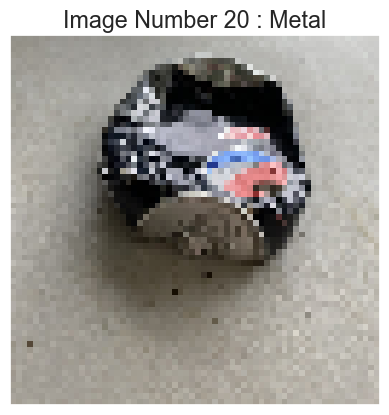

In [36]:
predictions = model_1.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

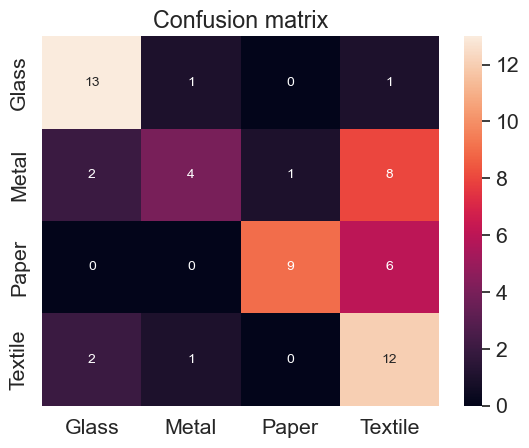

In [37]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()